# Deeper Learning (Neural Networks)

Source: Natural Language Processing in Action by Cole Howard, Hannes Hapke, and Hobson Lane (2019)

## Baby Steps with Neural Networks (Perceptrons and Backpropagation)

Learning the history of neural networks

Stacking perceptrons

Understanding backpropagation

Seeing the knobs to turn on neural networks

Implementing a basic neural network in Keras

###  Neural networks, the ingredient list

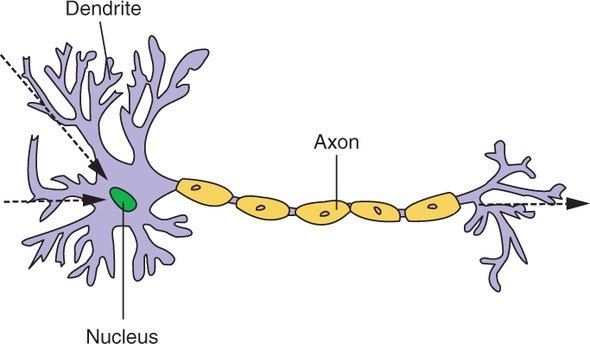

 Neuron cell

### Perceptron

   Generally, you’ll see the individual features denoted as xi, where i is a reference integer. And the collection of all features for a given example are denoted as X representing a vector:

X = [x_1, x_2, ..., x_i, ..., x_n]

And similarly, you’ll see the associate weights for each feature as wi, where i corresponds to the index of feature x associated with that weight. And the weights are generally represented as a vector w:

W = [w_1, w_2, ..., w_i, ..., w_n]



=> (x_1 * w_1) + (x_2 * w_2) + ... + (x_i * w_i) + ... + (x_n * w_n)


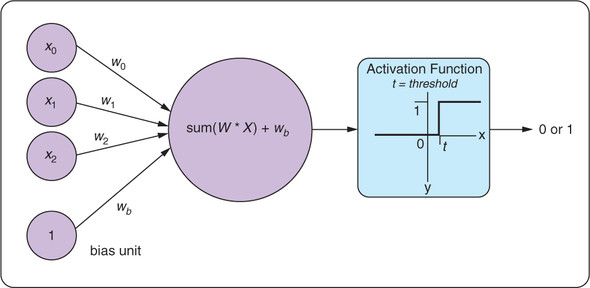

Basic perceptron

x와 w내적으로 구성된 펑션이 쓰레스홀드를 넘으면 1과 0으로 분류.

1과 0으로 분류할 수 있는 w(웨이트)값을 찾는 것이 목적

bias 유닛은 기본적으로 주어지는 상수값으로, 모든 값이 0이 되지 않게 함.

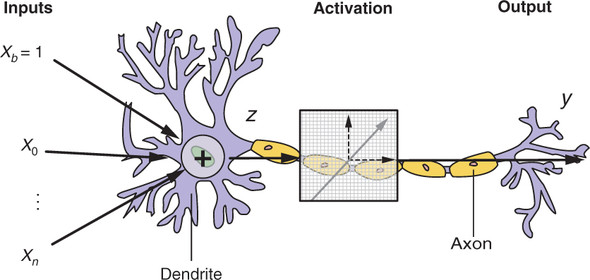

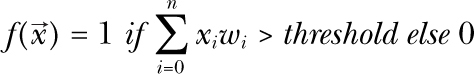

f(x)가 threshold 를 넘으면 1 아니면 0



인풋 -(w)-> 히든 -(감마)-> 아웃풋 이 아닌,

인풋 -(w)-> 아웃풋  (다이렉트로 예측)

In [1]:
import numpy as np
 
example_input = [1, .2, .1, .05, .2]
example_weights = [.2, .12, .4, .6, .90]  # 초기 값이니까 w는 임의로 줘도 됨
 
input_vector = np.array(example_input)
weights = np.array(example_weights)
bias_weight = .2
 
activation_level = np.dot(input_vector, weights) +(bias_weight * 1) 
activation_level


0.674

In [2]:
threshold = 0.5
if activation_level >= threshold:
    perceptron_output = 1
else:
    perceptron_output = 0
perceptron_output

1

In [5]:
expected_output = 0
new_weights = []
for i, x in enumerate(example_input):
    new_weights.append(weights[i] + (expected_output - perceptron_output) * x)  # 실제 아웃풋과 예측 아웃풋을 비교해서 웨이트를 업데이트
weights = np.array(new_weights)
 
example_weights

[0.2, 0.12, 0.4, 0.6, 0.9]

In [6]:
weights

array([-1.8 , -0.28,  0.2 ,  0.5 ,  0.5 ])

In [7]:
# 다른 예

sample_data = [[0, 0],  # False, False
              [0, 1],  # False, True
              [1, 0],  # True, False
              [1, 1]]  # True, True

expected_results = [0,  # (False OR False) gives False
                    1,  # (False OR True ) gives True
                    1,  # (True  OR False) gives True
                    1]  # (True  OR True ) gives True

activation_threshold = 0.5

In [11]:
from random import random
import numpy as np

weights = np.random.random(2)/1000  # Small random float 0 < w < .001
weights


array([0.00093043, 0.00094018])

In [12]:
bias_weight = np.random.random() / 1000
bias_weight

0.00026557800860681067

In [13]:
for idx, sample in enumerate(sample_data):
    input_vector = np.array(sample)
    activation_level = np.dot(input_vector, weights) + (bias_weight * 1) # 여기서는 bias 1개
    if activation_level > activation_threshold:
        perceptron_output = 1
    else:
        perceptron_output = 0
    print('Predicted {}'.format(perceptron_output))
    print('Expected: {}'.format(expected_results[idx]))
    print()

Predicted 0
Expected: 0

Predicted 0
Expected: 1

Predicted 0
Expected: 1

Predicted 0
Expected: 1



In [14]:
for iteration_num in range(5):
    correct_answers = 0
    for idx, sample in enumerate(sample_data):
        input_vector = np.array(sample)
        weights = np.array(weights)
        activation_level = np.dot(input_vector, weights) + (bias_weight * 1)
        if activation_level > activation_threshold:
            perceptron_output = 1
        else:
            perceptron_output = 0
        if perceptron_output == expected_results[idx]: # 두 결과가 같으면 정답
            correct_answers += 1
        new_weights = []
        for i, x in enumerate(sample):
            new_weights.append(weights[i] + (expected_results[idx] - perceptron_output) * x) # 다르면 업데이트
            bias_weight = bias_weight + ((expected_results[idx] - perceptron_output) * 1)
        weights = np.array(new_weights)
    print('{} correct answers out of 4, for iteration {}'.format(correct_answers, iteration_num))

3 correct answers out of 4, for iteration 0
2 correct answers out of 4, for iteration 1
3 correct answers out of 4, for iteration 2
4 correct answers out of 4, for iteration 3
4 correct answers out of 4, for iteration 4


### 0과1를 나누는 분류문제에서 퍼셉트론이 작동하는 방식은
### 결국 Logistic Regression에서 손실함수를 줄이는 w(=likelihood를 최대화 하는)를 찾는 과정과 같다.


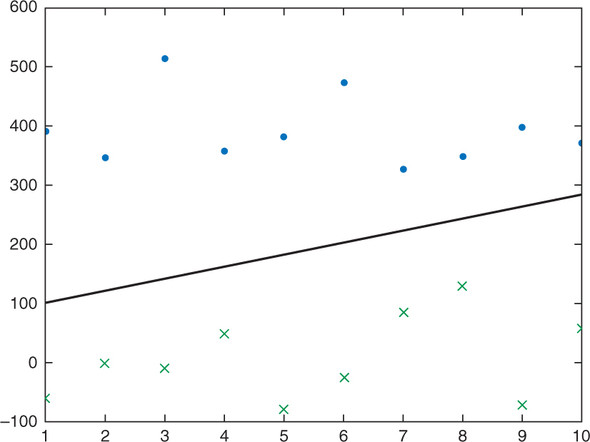

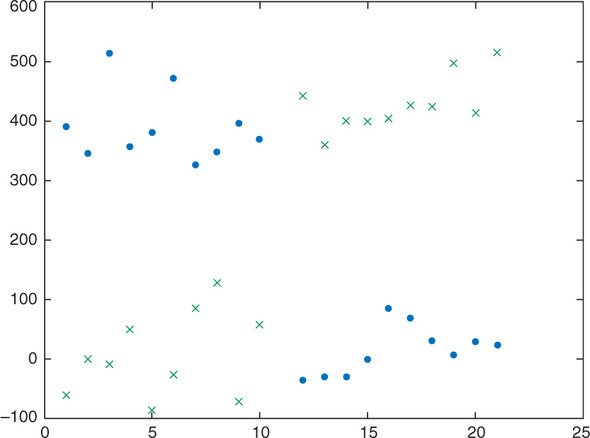

퍼셉트론의 문제는 두 번째 그래프와 같이 생긴 모형에는 제대로 작동할 수 없다.

이를 해결하기 위해 히든 레이어를 만든다.

중간에 층을 하나 더 만들어서 x와 베타가 예측한 1과 0을 만들고 다시 히든 레이어로 0과 1을 한 번 더 예측

A perceptron finds a linear equation that describes the relationship between the features of your dataset and the target variable in your dataset. A perceptron is just doing linear regression. A perceptron cannot describe a nonlinear equation or a nonlinear relationship.

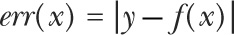

Error between truth and prediction

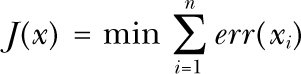

Cost function you want to minimize

다층 퍼셉트론

뉴런이 여러개가 있듯이 레이어도 여러개 만든다.

### Backpropagation (역전파)

우리가 궁금해하는 것은 아웃풋 레이어의 결과가 아니라, 그 결과를 내는 w가 궁금하다.

즉, 최적의 w를 찾기 위해 아웃풋 레이어의 결과를 염두에 두고 w를 업데이트 한다.

이러한 과정의 순서가 원인->결과 가 아닌, 결과->원인으로 가는 '역방향'이기 때문에 '역전파'라고 한다.


서로 연결되어 있기 때문에 미분 할 때 chain rull 사용

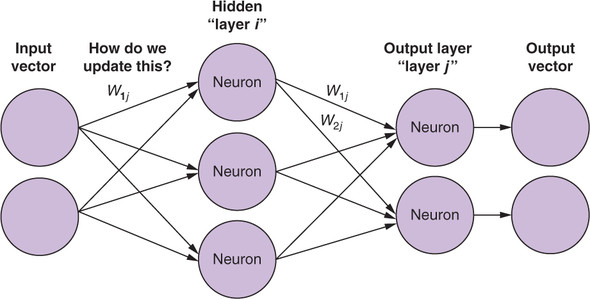

Neural net with hidden weights


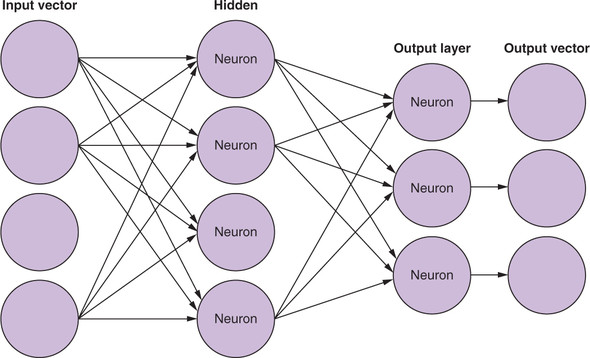

Fully connected neural net

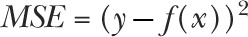

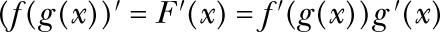

 Chain rule

인풋에서 히든으로, 히든에서 아웃풋으로 업데이트 하기 때문에 chain rull을 사용한다.

알파는 러닝레이트를 조정하는 값.

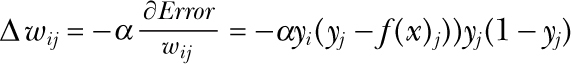

Error derivative

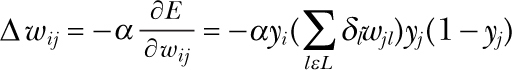

Derivative of the previous layer

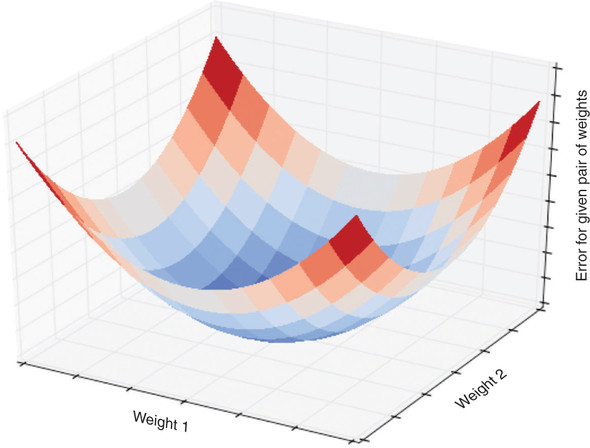

Convex error curve -> 이렇게 생기면 최저점을 찾기가 쉽다.

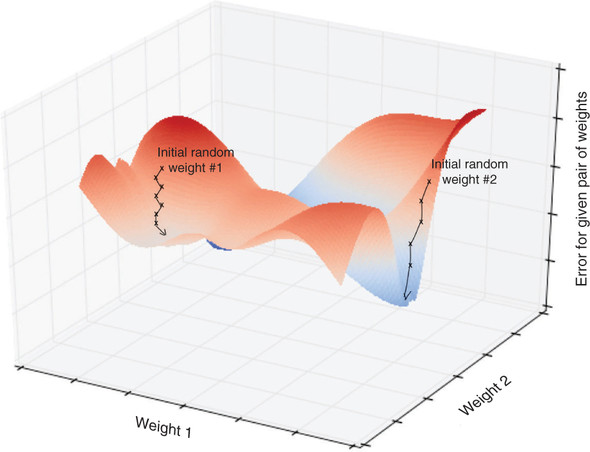

Nonconvex error curve

이렇게 생겼을 때는 배치 그라디언트 디센트 보다 스토케스틱 그라디언트 디센트가 성능이 더 좋다.

- 배치 : 전부 한꺼번에 
- 스토케스틱 : 한 레이어씩

###  Keras: Neural networks in Python

In [63]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
# Our examples for an exclusive OR.
x_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]) # 인풋
y_train = np.array([[0], [1], [1], [0]])             # 원하는 아웃풋
model = Sequential()
num_neurons = 10  # 히든 레이어의 특성?의 숫자
model.add(Dense(num_neurons, input_dim=2))  
model.add(Activation('tanh'))  # 엑티베이션 펑션. tanh : 하이퍼볼릭 탄젠트 펑션(시그모이드의 특성을 가짐)
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                30        
                                                                 
 activation_14 (Activation)  (None, 10)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                 11        
                                                                 
 activation_15 (Activation)  (None, 1)                 0         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [64]:
sgd = SGD(learning_rate=0.1) # gradient descent  알파는 임의로 0.1을 줌.
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [66]:
model.predict(x_train)  # 일단 그냥 돌려봄

1/1 [==============================] - 0s 12ms/step


array([[0.5       ],
       [0.50833064],
       [0.66426563],
       [0.6721591 ]], dtype=float32)

#### Fit model to the XOR training set

In [68]:
model.fit(x_train, y_train, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5000
Epoch 2/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5000
Epoch 3/1000
1/1 [==============================] - 0s 996us/step - loss: 0.6921 - accuracy: 0.5000
Epoch 4/1000
1/1 [==============================] - 0s 997us/step - loss: 0.6920 - accuracy: 0.5000
Epoch 5/1000
1/1 [==============================] - 0s 997us/step - loss: 0.6919 - accuracy: 0.5000
Epoch 6/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5000
Epoch 7/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.5000
Epoch 8/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5000
Epoch 9/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5000
Epoch 10/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.5000
Epoch 11/1000

1/1 [==============================] - 0s 2ms/step - loss: 0.6693 - accuracy: 0.7500
Epoch 165/1000
1/1 [==============================] - 0s 998us/step - loss: 0.6690 - accuracy: 0.7500
Epoch 166/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.6687 - accuracy: 0.7500
Epoch 167/1000
1/1 [==============================] - 0s 997us/step - loss: 0.6684 - accuracy: 0.7500
Epoch 168/1000
1/1 [==============================] - 0s 997us/step - loss: 0.6681 - accuracy: 0.7500
Epoch 169/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.6678 - accuracy: 0.7500
Epoch 170/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.6675 - accuracy: 0.7500
Epoch 171/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.6671 - accuracy: 0.7500
Epoch 172/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.6668 - accuracy: 0.7500
Epoch 173/1000
1/1 [==============================] - 0s 998us/step - loss: 0.6665 - accuracy: 0.7500
Epoch 1

1/1 [==============================] - 0s 3ms/step - loss: 0.5525 - accuracy: 1.0000
Epoch 327/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5513 - accuracy: 1.0000
Epoch 328/1000
1/1 [==============================] - 0s 998us/step - loss: 0.5500 - accuracy: 1.0000
Epoch 329/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5487 - accuracy: 1.0000
Epoch 330/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5474 - accuracy: 1.0000
Epoch 331/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5461 - accuracy: 1.0000
Epoch 332/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5447 - accuracy: 1.0000
Epoch 333/1000
1/1 [==============================] - 0s 997us/step - loss: 0.5434 - accuracy: 1.0000
Epoch 334/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5421 - accuracy: 1.0000
Epoch 335/1000
1/1 [==============================] - 0s 997us/step - loss: 0.5407 - accuracy: 1.0000
Epoch 336

1/1 [==============================] - 0s 2ms/step - loss: 0.3020 - accuracy: 1.0000
Epoch 489/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.3006 - accuracy: 1.0000
Epoch 490/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2991 - accuracy: 1.0000
Epoch 491/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2977 - accuracy: 1.0000
Epoch 492/1000
1/1 [==============================] - 0s 997us/step - loss: 0.2963 - accuracy: 1.0000
Epoch 493/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2949 - accuracy: 1.0000
Epoch 494/1000
1/1 [==============================] - 0s 996us/step - loss: 0.2935 - accuracy: 1.0000
Epoch 495/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2921 - accuracy: 1.0000
Epoch 496/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2907 - accuracy: 1.0000
Epoch 497/1000
1/1 [==============================] - 0s 997us/step - loss: 0.2893 - accuracy: 1.0000
Epoch 498

1/1 [==============================] - 0s 3ms/step - loss: 0.1428 - accuracy: 1.0000
Epoch 651/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1422 - accuracy: 1.0000
Epoch 652/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1416 - accuracy: 1.0000
Epoch 653/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1410 - accuracy: 1.0000
Epoch 654/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1404 - accuracy: 1.0000
Epoch 655/1000
1/1 [==============================] - 0s 997us/step - loss: 0.1399 - accuracy: 1.0000
Epoch 656/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1393 - accuracy: 1.0000
Epoch 657/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1387 - accuracy: 1.0000
Epoch 658/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1382 - accuracy: 1.0000
Epoch 659/1000
1/1 [==============================] - 0s 998us/step - loss: 0.1376 - accuracy: 1.0000
Epoch 660/1

1/1 [==============================] - 0s 2ms/step - loss: 0.0806 - accuracy: 1.0000
Epoch 813/1000
1/1 [==============================] - 0s 998us/step - loss: 0.0804 - accuracy: 1.0000
Epoch 814/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0802 - accuracy: 1.0000
Epoch 815/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0799 - accuracy: 1.0000
Epoch 816/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0797 - accuracy: 1.0000
Epoch 817/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0795 - accuracy: 1.0000
Epoch 818/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0792 - accuracy: 1.0000
Epoch 819/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0790 - accuracy: 1.0000
Epoch 820/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0788 - accuracy: 1.0000
Epoch 821/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0785 - accuracy: 1.0000
Epoch 822/1

1/1 [==============================] - 0s 2ms/step - loss: 0.0532 - accuracy: 1.0000
Epoch 975/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0530 - accuracy: 1.0000
Epoch 976/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0529 - accuracy: 1.0000
Epoch 977/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0528 - accuracy: 1.0000
Epoch 978/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0527 - accuracy: 1.0000
Epoch 979/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0526 - accuracy: 1.0000
Epoch 980/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0525 - accuracy: 1.0000
Epoch 981/1000
1/1 [==============================] - 0s 998us/step - loss: 0.0523 - accuracy: 1.0000
Epoch 982/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0522 - accuracy: 1.0000
Epoch 983/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0521 - accuracy: 1.0000
Epoch 9

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [69]:
model.predict(x_train) # 원아는 아웃풋이 0 1 1 0 이니까 이 값과 매우 유사하게 나왔다.

1/1 [==============================] - 0s 11ms/step


array([[0.0214793 ],
       [0.9435633 ],
       [0.94901514],
       [0.06605866]], dtype=float32)

In [75]:
y_train

array([[0],
       [1],
       [1],
       [0]])

#### Save the trained model

In [77]:
import h5py
model_structure = model.to_json()
 
with open("basic_model.json", "w") as json_file:  # 도출된 웨이트값을 저장
    json_file.write(model_structure)
    model.save_weights("basic_weights.h5")

---

## Reasoning with word vectors (Word2vec)

뉴러네트워크 방식을 워드투벡터에 적용해보자

Understanding how word vectors are created

Using pretrained models for your applications

Reasoning with word vectors to solve real problems

Visualizing word vectors

Uncovering some surprising uses for word embeddings

각각의 단어들의 특징을 숫자로 바꿔 이차원에 벡터로 나타낼 수 있다면?!

그럼 아래와 같은 연산이 가능해진다.

Portland Timbers + Seattle - Portland = ?

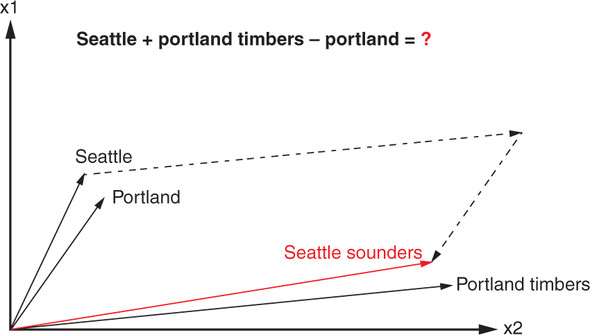

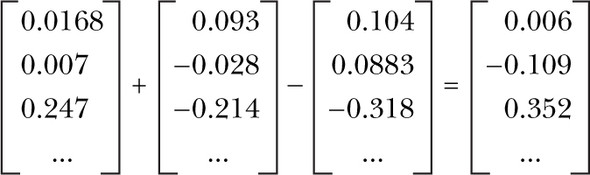

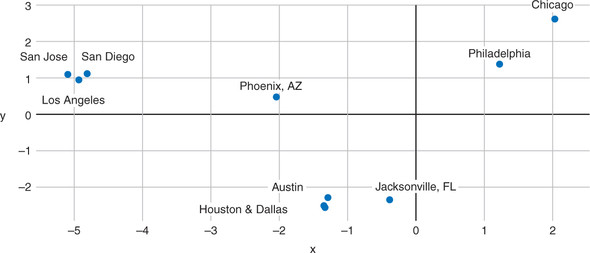

Word vectors for ten US cities projected onto a 2D map

지리적으로는 먼 도시들이 뉴스나 sns상에서 표현되는 단어의 특성에 따라 가까운 좌표로 모인다.

### Skip-gram approach

인풋워드의 양 옆 단어를 예측하도록 뉴러 네트워크를 돌리자.

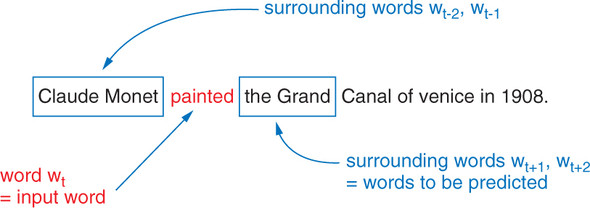

#### What is softmax?

소프트맥스 : sum해서 1이 나오도록 하는 펑션

0.5 / (0.5 + 0.9 + 0.2) = 0.309 <br>
0.9 / (0.5 + 0.9 + 0.2) = 0.461 <br>
0.2 / (0.5 + 0.9 + 0.2) = 0.229

0.309 + 0.461 + 0.229 = 0999 = 1

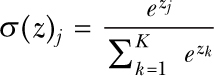

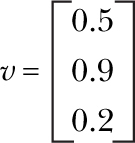

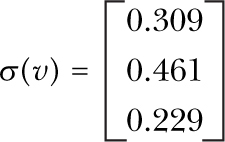

인풋은 원핫벡터 방식으로 집어넣는다.

모네는 1, 나머지는 0

모네를 넣으면 클라우드가 나오도록 학습시킴

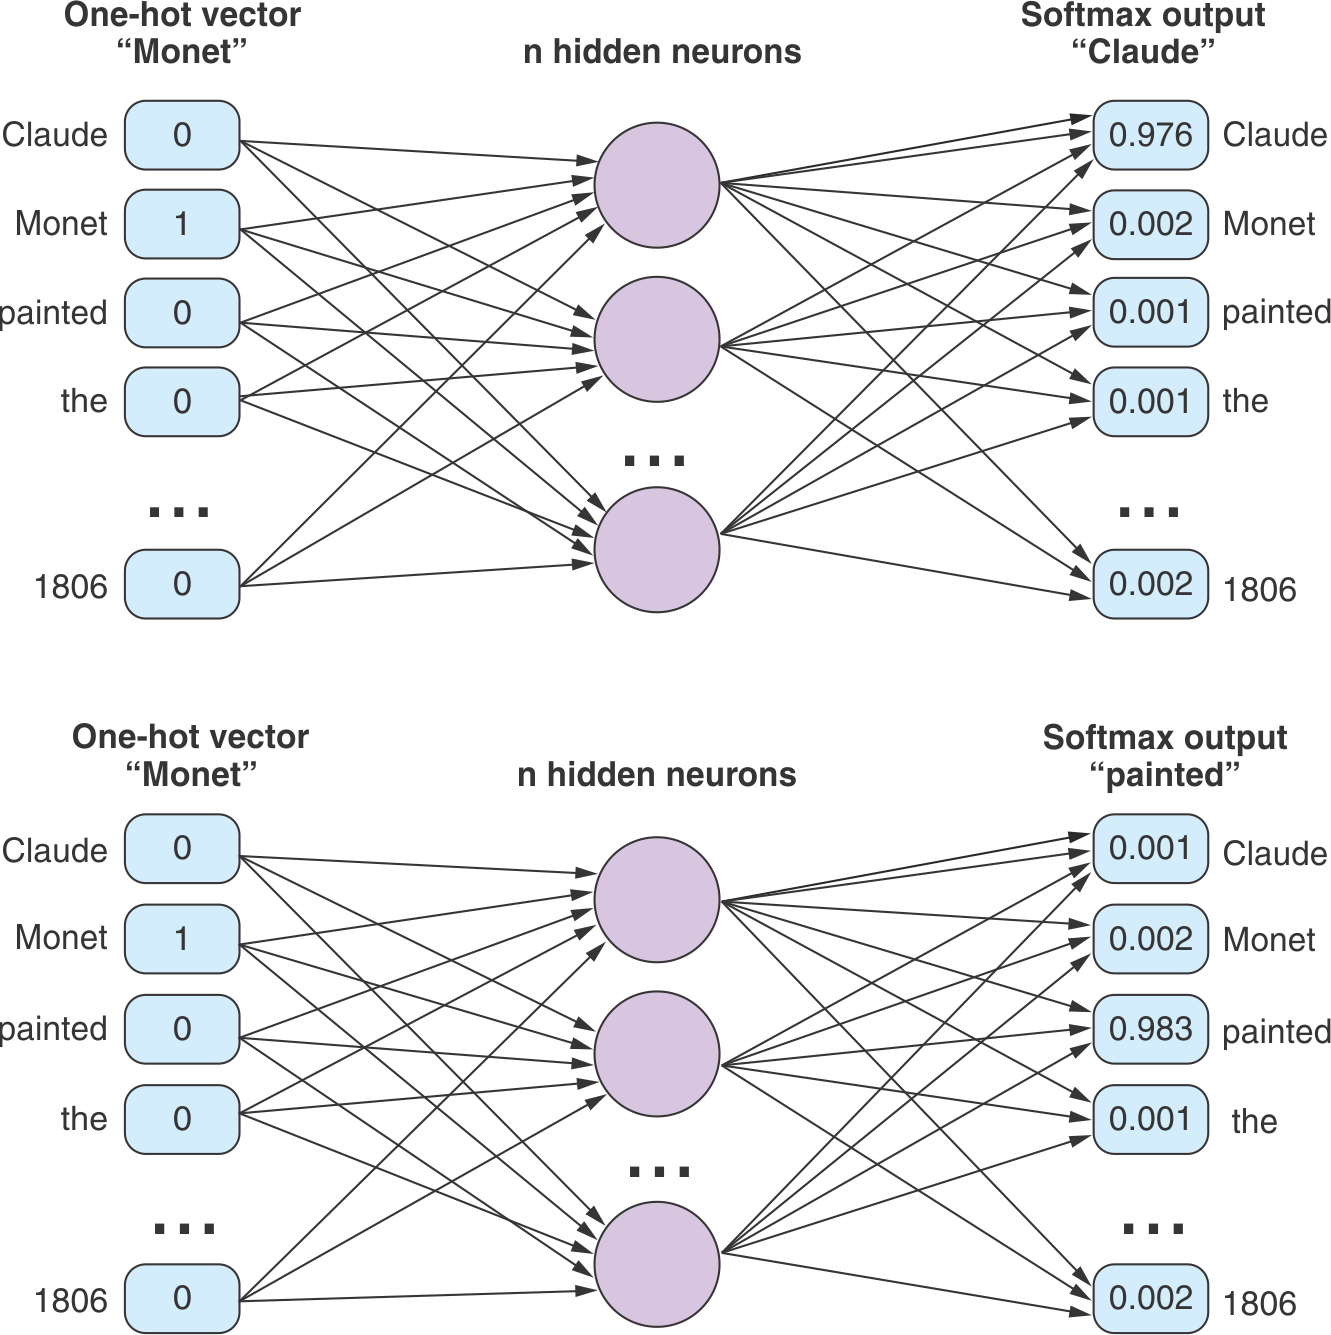

 Network example for the skip-gram training

In [78]:
sentence = "Claude Monet painted the Grand Canal of Venice in 1806."

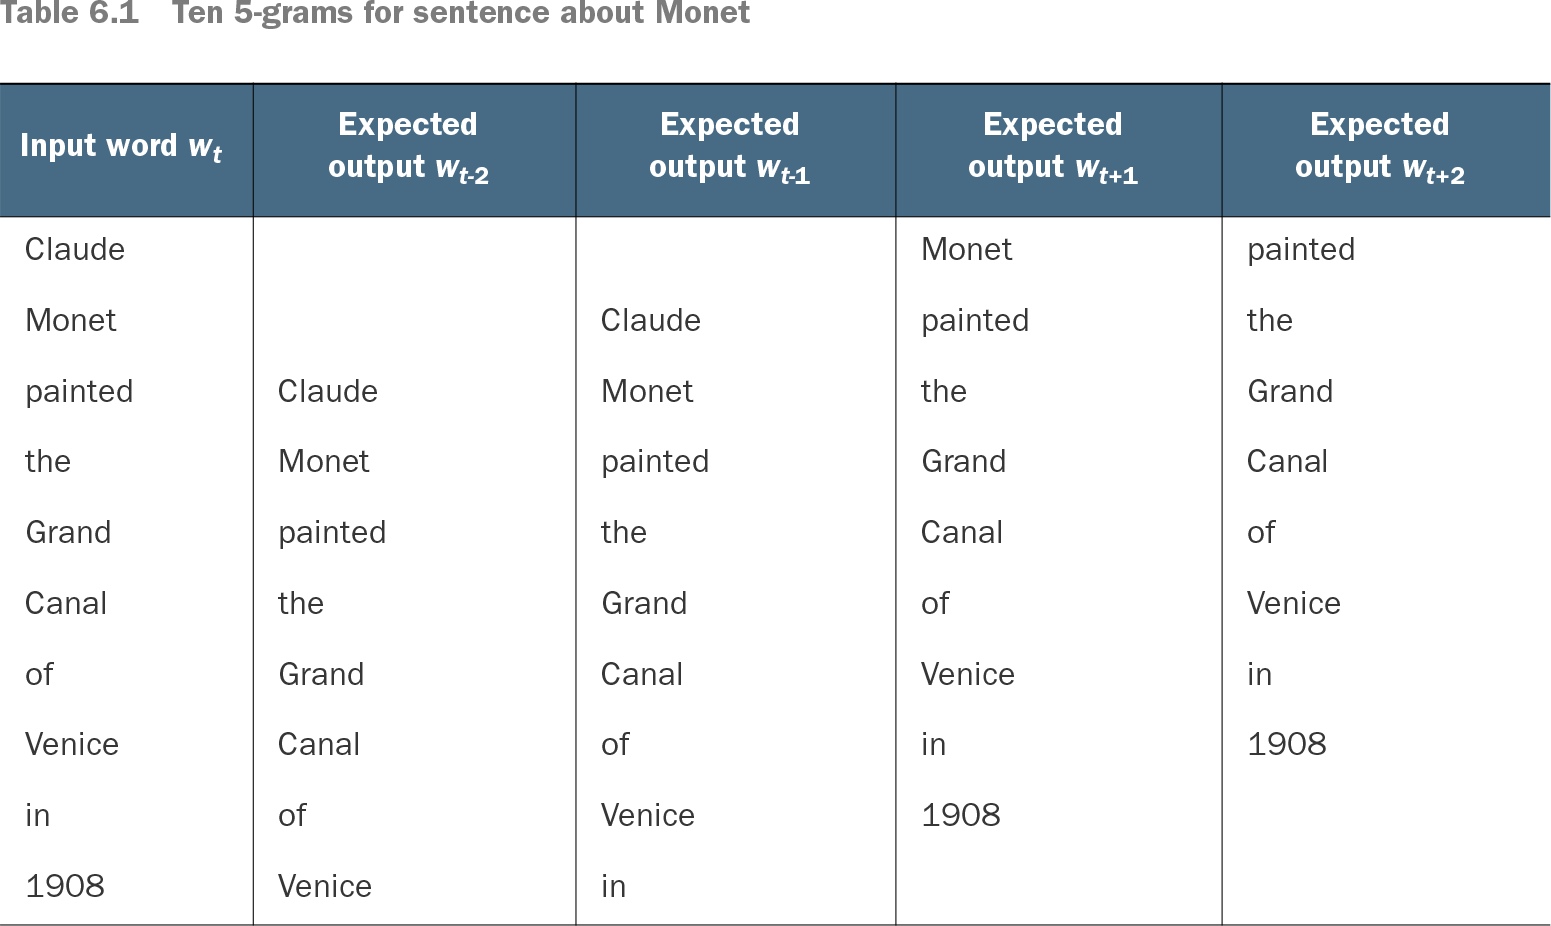

#### Retrieving word vectors with linear algebra

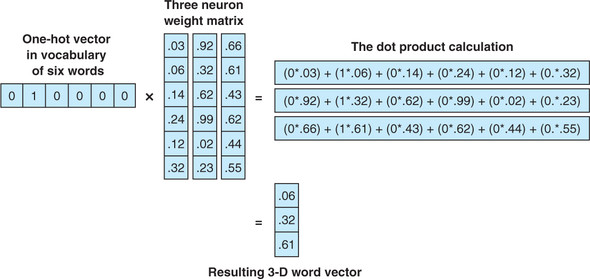

위의 결과로 나온 [0.06, 0.32, 0.61]이 워드 벡터다.

### Continuous bag-of-words approach

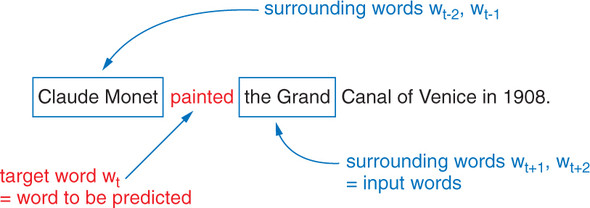

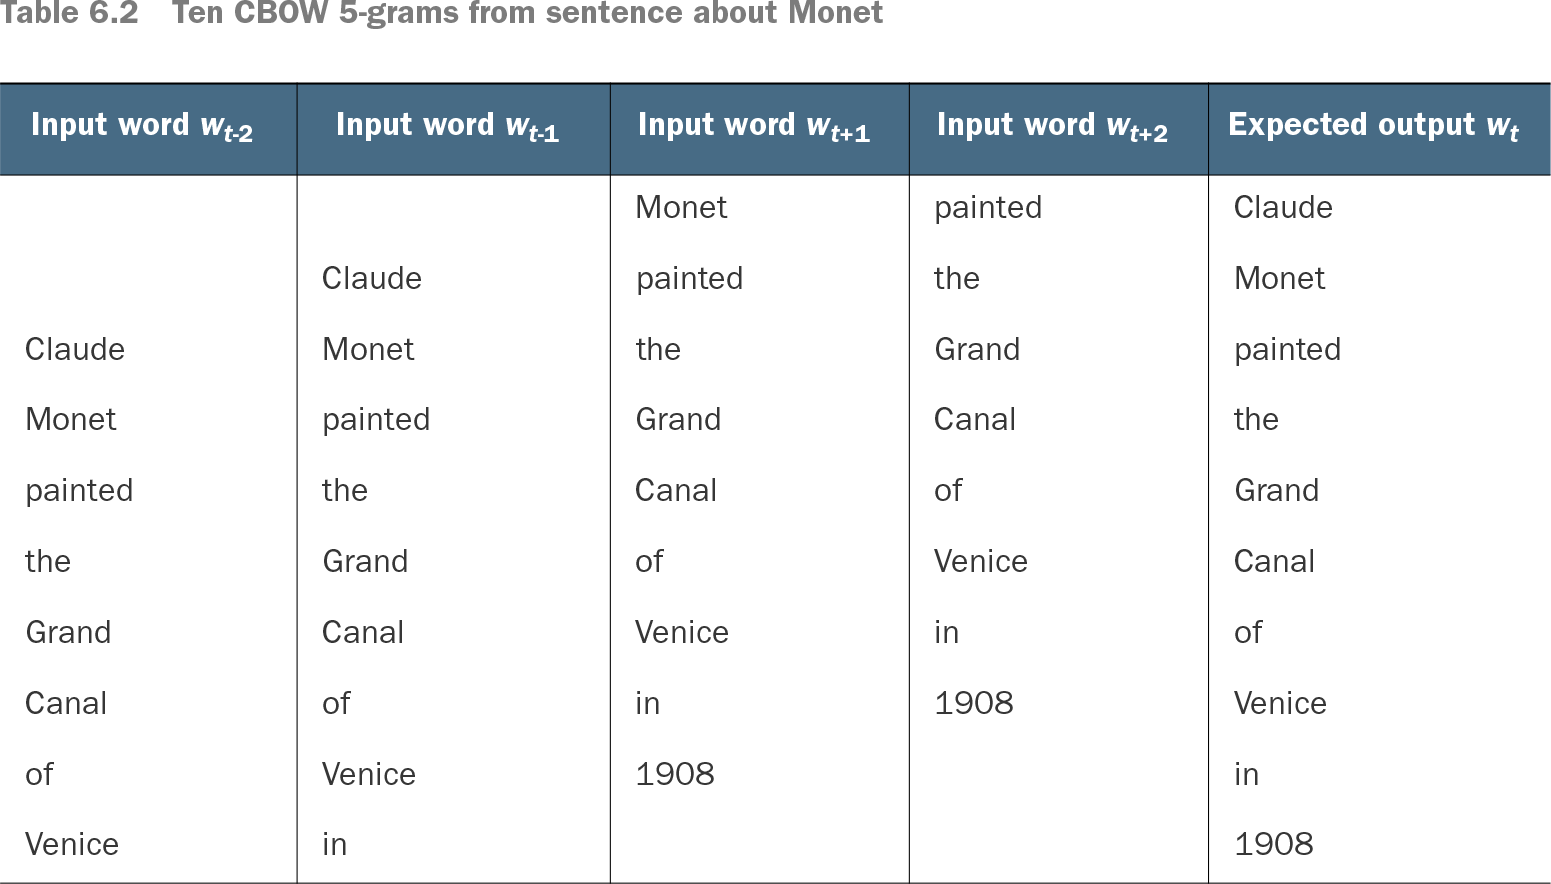

클라우드 + 모네 와 더 + 그랜드 가 들어갔을때 painted가 나오도록 예측

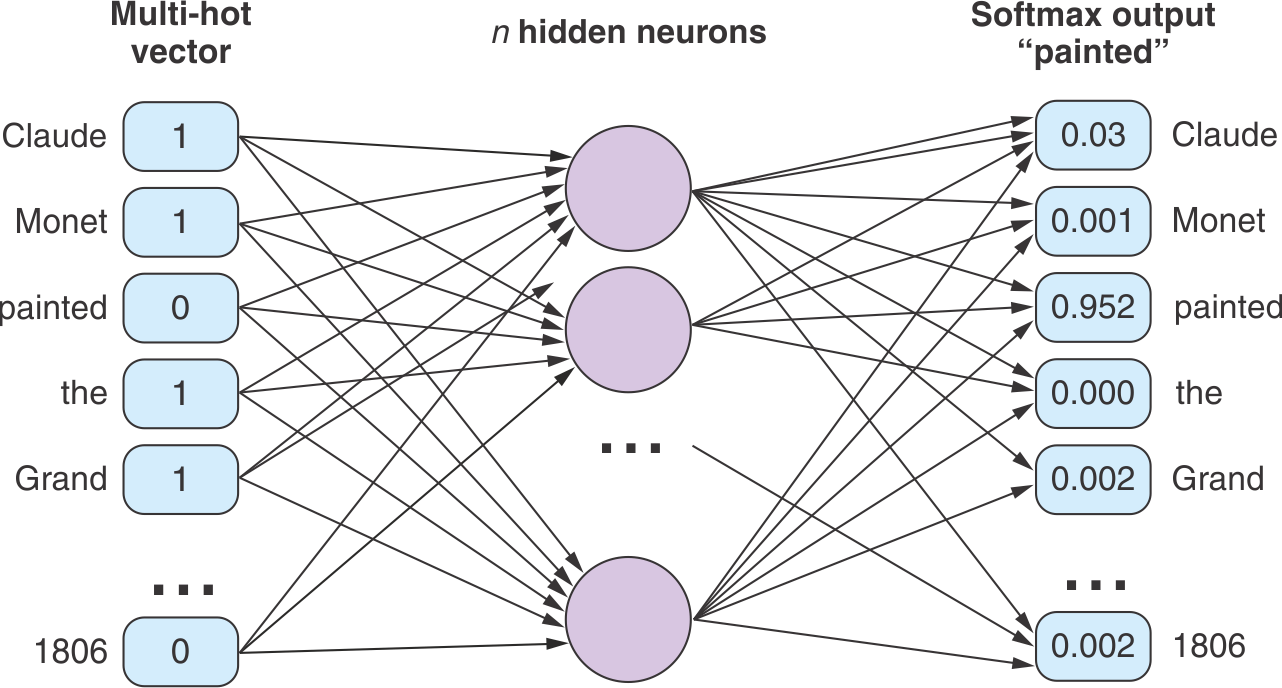

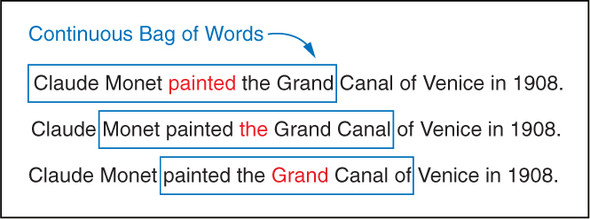

### How to use the gensim.word2vec module

In [ ]:
>>> from nlpia.data.loaders import get_data  # 인스톨 하는데 엄청 오래 걸림
>>> word_vectors = get_data('word2vec')

In [ ]:
>>> from gensim.models.keyedvectors import KeyedVectors
>>> word_vectors = KeyedVectors.load_word2vec_format(\
...     '/path/to/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [ ]:
>>> from gensim.models.keyedvectors import KeyedVectors
>>> word_vectors = KeyedVectors.load_word2vec_format(\
...     '/path/to/GoogleNews-vectors-negative300.bin.gz',
...         binary=True, limit=200000)

In [ ]:
>>> word_vectors.most_similar(positive=['cooking', 'potatoes'], topn=5) # 두 단어를 넣었을 때 관련있는 단어 5개 출력
[('cook', 0.6973530650138855),
('oven_roasting', 0.6754530668258667),
('Slow_cooker', 0.6742032170295715),
('sweet_potatoes', 0.6600279808044434),
('stir_fry_vegetables', 0.6548759341239929)]
>>> word_vectors.most_similar(positive=['germany', 'france'], topn=1)
[('europe', 0.7222039699554443)]

In [ ]:
>>> word_vectors.doesnt_match("potatoes milk cake computer".split()) # 문장에서 가장 매치되지 않는 단어 출력
'computer'

In [ ]:
>>> word_vectors.most_similar(positive=['king', 'woman'],  # 긍정과 부정을 지정해서 가장 관련있는 단어 2개 출력
...     negative=['man'], topn=2)
[('queen', 0.7118192315101624), ('monarch', 0.6189674139022827)]

In [ ]:
>>> word_vectors.similarity('princess', 'queen')  # 두 단어 사이의 유사도 계산
0.70705315983704509

In [ ]:
>>> word_vectors['phone']  # 이 단어가 가지는 웨이트들
array([-0.01446533, -0.12792969, -0.11572266, -0.22167969, -0.07373047,
      -0.05981445, -0.10009766, -0.06884766,  0.14941406,  0.10107422,
      -0.03076172, -0.03271484, -0.03125   , -0.10791016,  0.12158203,
       0.16015625,  0.19335938,  0.0065918 , -0.15429688,  0.03710938,
       ...

### How to generate your own word vector representations

#### Preprocessing steps

In [ ]:
>>> token_list
[
 ['to', 'provide', 'early', 'intervention/early', 'childhood', 'special',
  'education', 'services', 'to', 'eligible', 'children', 'and', 'their',
  'families'],
 ['essential', 'job', 'functions'],
 ['participate', 'as', 'a', 'transdisciplinary', 'team', 'member', 'to',
  'complete', 'educational', 'assessments', 'for']
 ...
]

In [ ]:
>>> from gensim.models.word2vec import Word2Vec
>>> num_features = 300
>>> min_word_count = 3
>>> num_workers = 2
>>> window_size = 6
>>> subsampling = 1e-3

In [ ]:
>>> model = Word2Vec(
...     token_list,
...     workers=num_workers,
...     size=num_features,
...     min_count=min_word_count,
...     window=window_size,
...     sample=subsampling)

In [ ]:
>>> model.init_sims(replace=True)
>>> model_name = "my_domain_specific_word2vec_model"
>>> model.save(model_name)

In [ ]:
>>> from gensim.models.word2vec import Word2Vec
>>> model_name = "my_domain_specific_word2vec_model"
>>> model = Word2Vec.load(model_name)
>>> model.most_similar('radiology')

자연어 처리의 두 가지 방법. 요약.

1. 백 오브 워즈 <br>
: 단어가 등장하는 형태소 단위로 끊어서 몇 개 나오고 각 단어의 중요도는 얼마인가?
  - 단어의 의미와 단어들 간의 관계를 무시한다는 단점이 있음
  
  
2. 워드 투 벡터 & 스킵그램 <br>
 : 워드의 의미와 관계를 계산하기 위해 벡터로 만든다.
  - 히든 레이어가 들어간 뉴런 각각을 단어들이 갖는 특정한 의미라고 생각하고 그 아이들을 설명할 수 있는 최적의 웨이트를 찾아서 그 단어를 구성.
  - 어떤 단어들이 주어졌을 때 그 단어의 양 옆 단어를 찾거나, 두 단어 사이의 가운데 단어를 찾을 수 있다.
  
  
3. Convolutional neural nets : 세 번째 방법은 다음 파일인 2.cnn 참고 